# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
from datetime import timedelta

# Load Dataset 

In [2]:
df = pd.read_csv(r"C:\Users\rahul\Downloads\ratings_Electronics (1).csv\ratings_Electronics (1).csv")

In [3]:
#dataframe columns and head of the dataset

In [4]:
df.columns = ['user_id','product_id','rating','timestamp']
df.head()

,user_id,product_id,rating,timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [5]:
#tail of the dataset

In [6]:
df.tail()

,user_id,product_id,rating,timestamp
7824476,A2YZI3C9MOHC0L,BT008UKTMW,5.0,1396569600
7824477,A322MDK0M89RHN,BT008UKTMW,5.0,1313366400
7824478,A1MH90R0ADMIK0,BT008UKTMW,4.0,1404172800
7824479,A10M2KEFPEQDHN,BT008UKTMW,4.0,1297555200
7824480,A2G81TMIOIDEQQ,BT008V9J9U,5.0,1312675200


In [7]:
#shape of the dataset

In [8]:
df.shape

(7824481, 4)

In [9]:
print("Total Reviews:" ,df.shape[0])
print("Total Columns:" ,df.shape[1])

Total Reviews: 7824481
Total Columns: 4


In [10]:
df.columns

Index(['user_id', 'product_id', 'rating', 'timestamp'], dtype='object')

In [11]:
df.head()

,user_id,product_id,rating,timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824481 entries, 0 to 7824480
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   user_id     object 
 1   product_id  object 
 2   rating      float64
 3   timestamp   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [13]:
# filtered dataset only these dataset i have done EDA

In [14]:
df = df.iloc[:1045875,0:]

In [15]:
#understand unique counts for the dataset

In [16]:
print('Total Data')
print('*'*50)
print("Total number of rating:",df.rating.nunique())
print("Total number of users:",df.user_id.nunique())
print("Total number of products:",df.product_id.nunique())

Total Data
**************************************************
Total number of rating: 5
Total number of users: 784539
Total number of products: 61812


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045875 entries, 0 to 1045874
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   user_id     1045875 non-null  object 
 1   product_id  1045875 non-null  object 
 2   rating      1045875 non-null  float64
 3   timestamp   1045875 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 31.9+ MB


In [18]:
#check datatypes

In [19]:
df.dtypes

user_id        object
product_id     object
rating        float64
timestamp       int64
dtype: object

In [20]:
#check missing values

In [21]:
df.isnull().sum()

user_id       0
product_id    0
rating        0
timestamp     0
dtype: int64

In [22]:
# check Duplicate data

In [23]:
df[df.duplicated()].any()

user_id       False
product_id    False
rating        False
timestamp     False
dtype: bool

In [24]:
# rating describe summary

In [25]:
df.describe()['rating'].transpose()

count    1.045875e+06
mean     3.973182e+00
std      1.399566e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [26]:
#How many ratings per User ID do we have?

In [27]:
df[['user_id','product_id']].groupby(['user_id']).count().head()

,product_id
user_id,
A00037441I8XOQJSUWCAG,1
A00038802J7X43YTW44TD,2
A000428226SAAAIBK8I36,1
A0004478EF5NFPHLGCWG,1
A000681618A3WRMCK53V,1


In [28]:
df[['user_id','product_id']].groupby(['user_id']).count().describe().transpose()

,count,mean,std,min,25%,50%,75%,max
product_id,784539.0,1.333108,1.384894,1.0,1.0,1.0,1.0,412.0


In [29]:
#How many user ratings per product id do we have

In [30]:
df[['user_id','product_id']].groupby(['product_id']).count().head()

,user_id
product_id,
0321732944,1
0439886341,3
0511189877,6
0528881469,27
0558835155,1


In [31]:
df[['user_id','product_id']].groupby(['product_id']).count().describe().transpose()

,count,mean,std,min,25%,50%,75%,max
user_id,61812.0,16.920258,89.658349,1.0,1.0,3.0,9.0,9487.0


In [32]:
#unique value of rating

In [33]:
print("Unique value of rating:",df.rating.unique())

Unique value of rating: [5. 1. 3. 2. 4.]


In [34]:
#find minimum and maximum rating

In [35]:
print('Minimum Rating is:%d' %(df.rating.min()))
print('\n')
print('Maximum Rating is :%d'%(df.rating.max()))

Minimum Rating is:1


Maximum Rating is :5


# Exploratory Data Analysis

In [36]:
# Avearage rating of Products

In [37]:
rating = pd.DataFrame(df.groupby('product_id')['rating'].mean())
rating['rating_count'] = pd.DataFrame(df.groupby('product_id')['rating'].count())
rating['rating_average'] = pd.DataFrame(df.groupby('product_id')['rating'].mean())
rating.head()

,rating,rating_count,rating_average
product_id,,,
0321732944,5.000000,1,5.000000
0439886341,1.666667,3,1.666667
0511189877,4.500000,6,4.500000
0528881469,2.851852,27,2.851852
0558835155,3.000000,1,3.000000


#### Rating vs User

In [38]:
ratings = df.groupby("rating").agg({"rating":"count"})

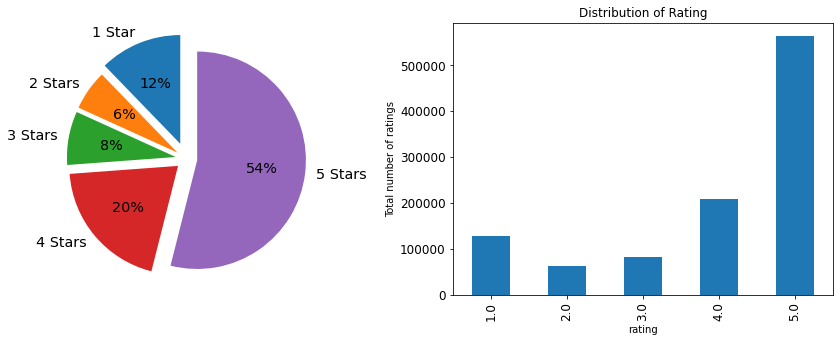

In [39]:
figsize = (15,5)
fig, (ax1,ax2) = plt.subplots(1,2,figsize=figsize)
ratings.plot.pie(ax=ax1,y="rating", legend=False, autopct='%1.f%%', startangle=90, fontsize="x-large", 
                 labels=["1 Star","2 Stars","3 Stars","4 Stars","5 Stars"],explode=[0.15,0.1,0.1,0.1,0.1])
ax1.set_ylabel('')
ratings.plot.bar(ax=ax2,  fontsize="large")
ax2.set(ylabel="Total number of ratings")
ax2.set(title="Distribution of Rating")
ax2.get_legend().remove()

plt.show()

In [40]:
rating_by_user = df.groupby(by='user_id')['rating'].count().sort_values(ascending=False)

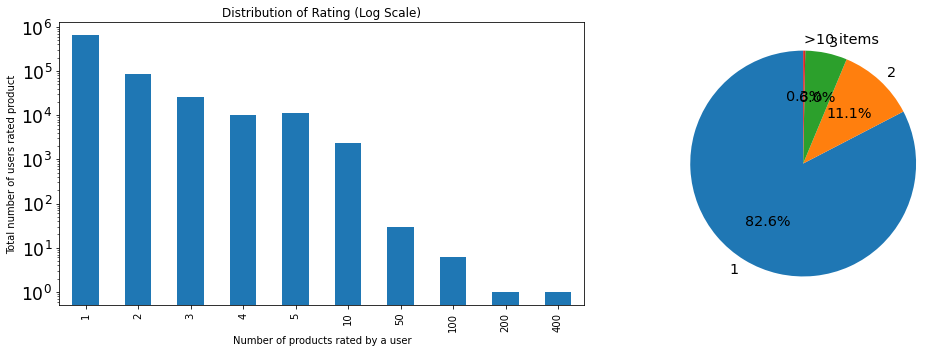

In [41]:
rating_hist,  bins  = np.histogram(rating_by_user, bins=[1,2,3,4,5,10,50,100,200,400,500])
rating_hist2, bins2 = np.histogram(rating_by_user, bins=[1,2,3,10,100000])

figsize = (15,5)
fig, (ax1,ax2) = plt.subplots(1,2,figsize=figsize)

pd.DataFrame({"Numbers of User":rating_hist,"Total Rates":bins[:-1]}).plot.bar(x="Total Rates", ax=ax1)
ax1.set(yscale="log")
ax1.set(ylabel="Total number of users rated product", xlabel="Number of products rated by a user")
ax1.set(title="Distribution of Rating (Log Scale)")
ax1.get_legend().remove()
[item.set_fontsize("xx-large") for item in ax1.get_yticklabels()]

pd.DataFrame({"Numbers of User":rating_hist2,"Total Rates":bins2[:-1]}).plot.pie(x="Total Rates",y="Numbers of User",
              labels=[1,2,3,">10 items"], ax=ax2,legend=False, autopct='%1.1f%%', startangle=90, fontsize="x-large")
ax2.set_ylabel('')
plt.tight_layout()
plt.show()

Only 0.6% of users rated more than 10 products

#### Rating vs Product

In [42]:
rating_by_product = df.groupby("product_id")["rating"].count().sort_values(ascending=False).reset_index()
rating_by_product.head()

,product_id,rating
0,B0002L5R78,9487
1,B0001FTVEK,5345
2,B000I68BD4,4903
3,B000BQ7GW8,4275
4,B00007E7JU,3523


In [43]:
rating_by_product = df.groupby("product_id").agg({"user_id":"count","rating":"mean"}).rename(columns={"user_id":"Number of Ratings","rating":"Average Rating"}).reset_index()
rating_by_product.head()

,product_id,Number of Ratings,Average Rating
0,0321732944,1,5.000000
1,0439886341,3,1.666667
2,0511189877,6,4.500000
3,0528881469,27,2.851852
4,0558835155,1,3.000000


In [44]:
print("**Top 10 products by Number of Ratings**")
rating_by_product.sort_values(by="Number of Ratings",ascending=False ).reset_index(drop=True).head(10)

**Top 10 products by Number of Ratings**


,product_id,Number of Ratings,Average Rating
0,B0002L5R78,9487,4.448614
1,B0001FTVEK,5345,4.007109
2,B000I68BD4,4903,3.501530
3,B000BQ7GW8,4275,4.553216
4,B00007E7JU,3523,4.565995
5,B000BKJZ9Q,3219,4.440509
6,B000B9RI14,2996,4.775701
7,B000A6PPOK,2828,3.950495
8,B00007M1TZ,2608,3.976610
9,B00004ZCJE,2547,4.123675


<AxesSubplot:xlabel='product_id'>

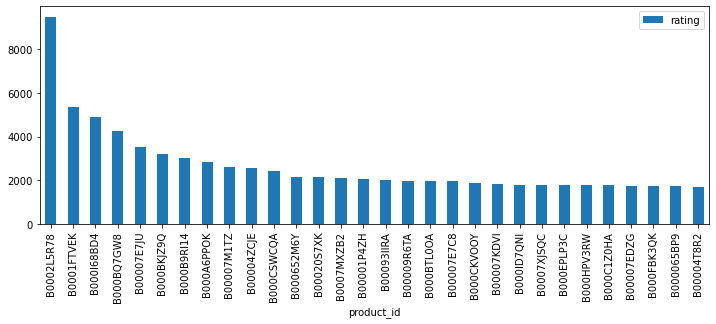

In [45]:
popular_products = pd.DataFrame(df.groupby('product_id')['rating'].count())
most_popular = popular_products.sort_values('rating', ascending=False)
most_popular.head(30).plot(kind = "bar",figsize=(12, 4))

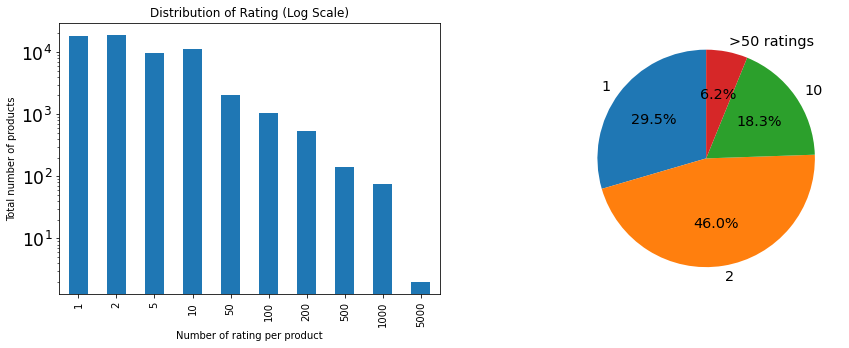

In [46]:
rating_hist,  bins  = np.histogram(rating_by_product["Number of Ratings"], bins=[1,2,5,10,50,100,200,500,1000,5000,10000])
rating_hist2, bins2 = np.histogram(rating_by_product["Number of Ratings"], bins=[1,2,10,50,100000])

figsize = (15,5)
fig, (ax1,ax2) = plt.subplots(1,2,figsize=figsize)

pd.DataFrame({"Numbers of Products":rating_hist,"Total Rates":bins[:-1]}).plot.bar(x="Total Rates", ax=ax1)
ax1.set(yscale="log")
ax1.set(ylabel="Total number of products", xlabel="Number of rating per product")
ax1.set(title="Distribution of Rating (Log Scale)")
ax1.get_legend().remove()
[item.set_fontsize("xx-large") for item in ax1.get_yticklabels()]

pd.DataFrame({"Numbers of User":rating_hist2,"Total Rates":bins2[:-1]}).plot.pie(x="Total Rates",y="Numbers of User",
              labels=[1,2,10,">50 ratings"], ax=ax2,legend=False, autopct='%1.1f%%', startangle=90, fontsize="x-large")
ax2.set_ylabel('')

plt.show()

Only 6.2% of products rated by more than 50 people

#### Products by Average Rating

In [47]:
# Define Cutoff is the value where the products is counted when its number of ratings is greater than.
# product with less than cutoff number of ratings will be neglected

cutoff = 50
top_rated = rating_by_product.loc[rating_by_product["Number of Ratings"]>cutoff].sort_values(
                                by="Average Rating",ascending=False).reset_index(drop=True)

In [48]:
print("**Top 5 Products have the highest Ratings**")
top_rated.head(5)

**Top 5 Products have the highest Ratings**


,product_id,Number of Ratings,Average Rating
0,B0000DYV9H,76,4.947368
1,B000053HC5,166,4.945783
2,B00009R96C,105,4.885714
3,B00005LE76,58,4.879310
4,B000I1X3W8,253,4.869565


In [49]:
print("**With cutoff = {} we have only {:,} products.**".format(cutoff,top_rated.shape[0] ))
top_rated.describe().transpose()

**With cutoff = 50 we have only 3,732 products.**


,count,mean,std,min,25%,50%,75%,max
Number of Ratings,3732.0,180.114148,321.878740,51.000000,66.000000,96.000,170.000000,9487.000000
Average Rating,3732.0,3.970647,0.557793,1.203704,3.666667,4.075,4.397038,4.947368


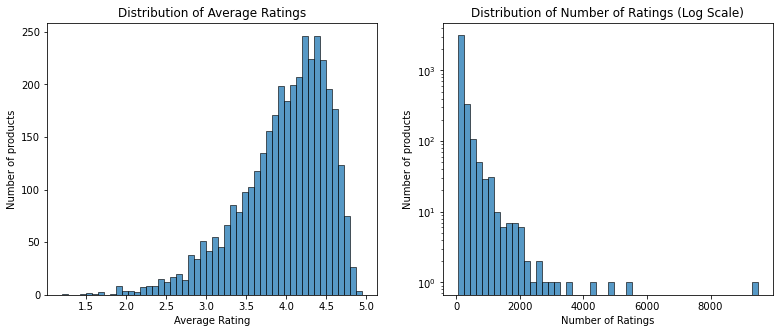

In [50]:
figsize = (13,5)
fig, (ax1,ax2) = plt.subplots(1,2,figsize=figsize)

sns.histplot(data=top_rated["Average Rating"], bins=50, ax=ax1)
ax1.set(title="Distribution of Average Ratings", ylabel="Number of products")

sns.histplot(data=top_rated["Number of Ratings"], bins=50, ax=ax2)
ax2.set(title="Distribution of Number of Ratings (Log Scale)")
ax2.set(yscale="log", ylabel="Number of products")
plt.show();

**Joint Graph**


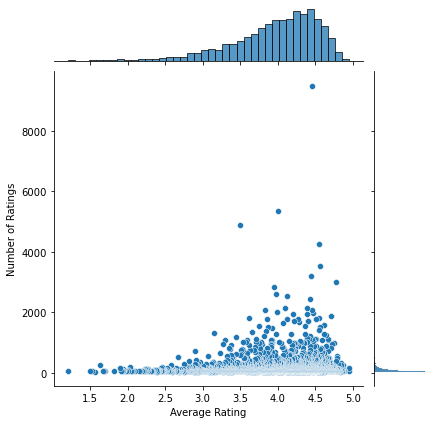

In [51]:
print("**Joint Graph**")
sns.jointplot(x='Average Rating', y='Number of Ratings', data=top_rated);

In [52]:
# Number of rating each day

In [53]:
data_by_date = df.copy()
data_by_date.timestamp = pd.to_datetime(df.timestamp, unit="s")#.dt.date
data_by_date = data_by_date.sort_values(by="timestamp", ascending=False).reset_index(drop=True)
print("**Number of Ratings each day:**")
data_by_date.groupby("timestamp")["rating"].count().tail(10).reset_index()

**Number of Ratings each day:**


,timestamp,rating
0,2014-07-14,304
1,2014-07-15,222
2,2014-07-16,208
3,2014-07-17,75
4,2014-07-18,90
5,2014-07-19,73
6,2014-07-20,76
7,2014-07-21,103
8,2014-07-22,96
9,2014-07-23,11


In [54]:
#number of rating over years

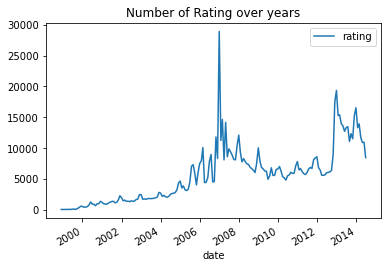

In [55]:
data_by_date["year"]  = data_by_date.timestamp.dt.year
data_by_date["month"] = data_by_date.timestamp.dt.month
rating_by_year = data_by_date.groupby(["year","month"])["rating"].count().reset_index()
rating_by_year["date"] = pd.to_datetime(rating_by_year["year"].astype("str")  +"-"+rating_by_year["month"].astype("str") +"-1")
rating_by_year.plot(x="date", y="rating")
plt.title("Number of Rating over years")
plt.show()

# Recently Polular Items

Top products rated during period of 30 days

In [56]:
begin_date     = data_by_date.timestamp[0] - timedelta(days=30)
data_by_date30 = data_by_date.loc[ data_by_date.timestamp > begin_date  ]
products_30days= data_by_date30.groupby(["product_id"]).agg({"rating":["mean","count"]}).droplevel(axis=1,level=0).reset_index()

In [57]:
#List of top products by number of rating

List of top products by number of rating


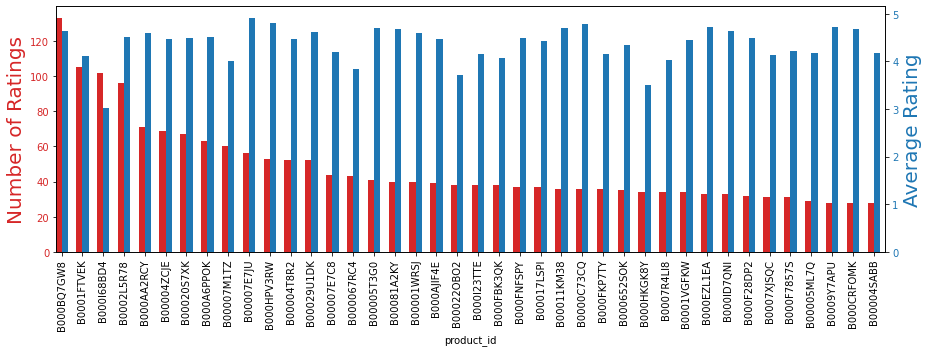

In [58]:
top_rated = products_30days.sort_values(by="count", ascending=False).head(40)

print('List of top products by number of rating')
figsize = (13,5)
fig0, ax1 = plt.subplots(figsize=figsize)
ax2 = ax1.twinx()
top_rated.plot(kind = "bar",x="product_id", y="count", 
                        ax=ax1,align='edge', color="tab:red", width=-0.3, legend=False)
top_rated.plot(kind = "bar",x="product_id", y="mean", 
                        ax=ax2, align='edge',color="tab:blue", width=0.3, legend=False)
############# Style Set up ###############
ax1.set_ylabel('Number of Ratings', color="tab:red", fontsize=20)
ax1.tick_params(axis='y', labelcolor="tab:red")
ax2.set_ylabel('Average Rating', color="tab:blue", fontsize=20)
ax2.tick_params(axis='y', labelcolor="tab:blue")

plt.tight_layout()
plt.show()

In [59]:
#List of top products by Average Rating

List of top products by Average Rating


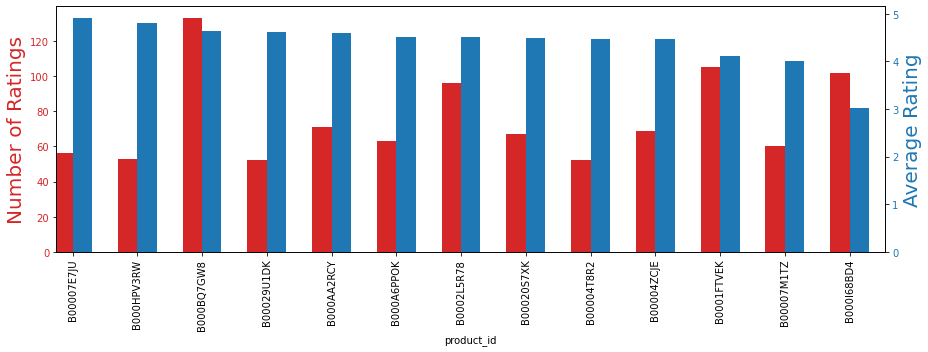

In [60]:
top_rated = products_30days.loc[products_30days["count"] > 50].sort_values(by="mean", ascending=False).head(40)

print('List of top products by Average Rating')
figsize = (13,5)
fig0, ax1 = plt.subplots(figsize=figsize)
ax2 = ax1.twinx()
top_rated.plot(kind = "bar",x="product_id", y="count", 
                        ax=ax1,align='edge', color="tab:red", width=-0.3, legend=False)
top_rated.plot(kind = "bar",x="product_id", y="mean", 
                        ax=ax2, align='edge',color="tab:blue", width=0.3, legend=False)
############# Style Set up ###############
ax1.set_ylabel('Number of Ratings', color="tab:red", fontsize=20)
ax1.tick_params(axis='y', labelcolor="tab:red")
ax2.set_ylabel('Average Rating', color="tab:blue", fontsize=20)  
ax2.tick_params(axis='y', labelcolor="tab:blue")

plt.tight_layout()
plt.show()

In [61]:
import klib

GridSpec(6, 2)

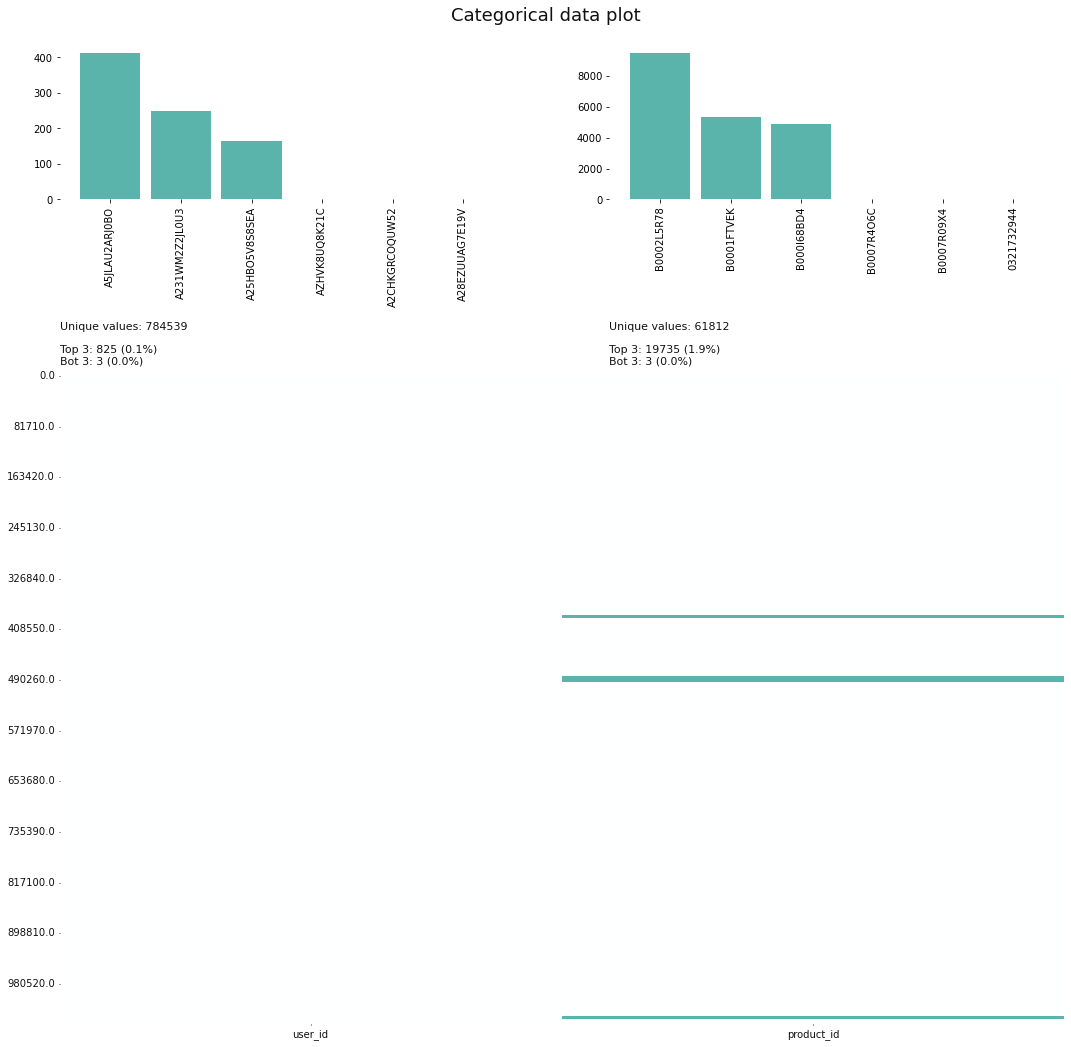

In [62]:
klib.cat_plot(df)

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='timestamp', ylabel='Density'>

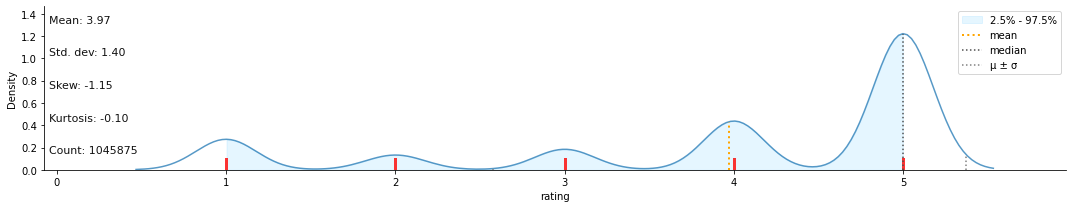

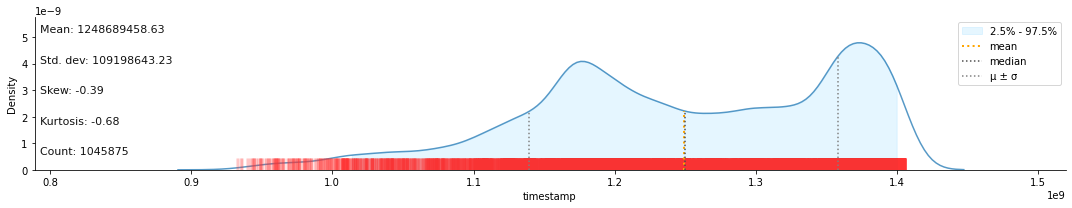

In [63]:
klib.dist_plot(df)

In [64]:
klib.missingval_plot(df)

No missing values found in the dataset.


In [65]:
klib.data_cleaning(df)

Shape of cleaned data: (1045875, 4) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 7.98 MB (-25.0%)



,user_id,product_id,rating,timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600
...,...,...,...,...
1045870,A3G18HHUSKVTJJ,B000IDC0K2,4.0,1370649600
1045871,AQ9KYCUI2G39,B000IDC0K2,3.0,1360540800
1045872,A3RO5WM78T079,B000IDC0K2,3.0,1373155200
1045873,A28EZUUAG7E19V,B000IDC0K2,4.0,1399420800


# Preprocessing

In [66]:
# Given some of our findings, let's try to optimize our dataset by filtering to only the data that we need

# We first try out the popularity of the products by filtering those that were at least rated


popularity_thres = 1

rating_count_df = df[['rating','product_id']].groupby(['product_id']).count()

popular_df = rating_count_df[rating_count_df['rating']>=popularity_thres]

filtered_pop_df = df[df.product_id.isin(popular_df.index.values)]

filtered_pop_df = df[df.product_id.isin(popular_df.index.values)]
print('shape of original ratings data: ', df.shape)
print('shape of ratings data after dropping unpopular products: ', filtered_pop_df.shape)

shape of original ratings data:  (1045875, 4)
shape of ratings data after dropping unpopular products:  (1045875, 4)


In [67]:
filtered_pop_df.head()

,user_id,product_id,rating,timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [68]:
# The size of the popular products are just the same as the original dataset. Let us try another filtering.

In [69]:
#filtering for active users

# Let us filter active users who have rated at least 50 times.
rating_thres = 50

active_users_count_df = df[['rating', 'user_id']].groupby(['user_id']).count()

active_users_df = active_users_count_df[active_users_count_df['rating']>=rating_thres]

filtered_active_users_df = df[df.user_id.isin(active_users_df.index.values)].reset_index()

print('shape of original ratings data: ', df.shape)
print('shape of ratings data after dropping unpopular products: ', filtered_active_users_df.shape)

shape of original ratings data:  (1045875, 4)
shape of ratings data after dropping unpopular products:  (3401, 5)


In [70]:
# Now let's pivot the dataframe such that it will have productId as the index, and userId as columns


filtered_ratings_df = pd.pivot(filtered_active_users_df,index='product_id', columns='user_id', values='rating').fillna(0)
filtered_ratings_df.head()

user_id,A11D1KHM7DVOQK,A12DLJESJKM1OQ,A1435P5AMCPB3X,A149RNR5RH19YY,A15QYHQH80W30L,A1F9Z42CFF9IAY,A1FR68QH6Z4YZM,A1JWSDDIH5Z7DV,A1MJMYLRTZ76ZX,A1ODOGXEYECQQ8,...,A6FIAB28IS79,A7Y6AVS576M03,ABH9D1TEOJ56E,AGHZXQL9F94T9,AGXV8E7XK9J6H,AKT8TGIT6VVZ5,ALUNVOQRXOZIA,AT2J7H5TRZM8Z,AT6CZDCP4TRGA,AWPODHOB4GFWL
product_id,,,,,,,,,,,,,,,,,,,,,
1400532655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400599997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9043413585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B000000O48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B000001OL6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
from scipy.sparse import csr_matrix

In [72]:
from sklearn.neighbors import NearestNeighbors

from sklearn.decomposition import TruncatedSVD

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.datasets import load_iris

from surprise import Dataset, Reader

from surprise.model_selection import cross_validate 

from surprise import SVD

from surprise import KNNBasic


from surprise import Reader, Dataset, KNNBasic, SVD
from surprise.model_selection import LeaveOneOut

In [73]:
ratings_matrix = csr_matrix(filtered_ratings_df.values)
ratings_matrix

<2903x37 sparse matrix of type '<class 'numpy.float64'>'
	with 3401 stored elements in Compressed Sparse Row format>

# Memory - based Approach
### Using KNN estimate distance

In [74]:
# Metric is the distance algorithm to be used. You can find more choices here: 
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html#sklearn.neighbors.DistanceMetric

# algorithm is the type of tree search used by the model
# neighbors it the amount of neighbors identified
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)

# fit
model_knn.fit(ratings_matrix)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [75]:
# Let's try it out
bought_product = "B00"
print('You have input product:', bought_product)

# find product that "match"
matches_df = filtered_active_users_df[filtered_active_users_df['product_id'].str.contains(bought_product)]
matches_df

You have input product: B00


,index,user_id,product_id,rating,timestamp
3,7380,A2AEZQ3DGBBLPR,B000000O48,5.0,1038873600
4,7447,A2R6RA8FRBS608,B000001OL6,4.0,1209513600
5,7747,A680RUE1FDO8B,B000001OMI,5.0,1227744000
6,7788,A11D1KHM7DVOQK,B000001OMN,2.0,1167350400
7,8349,A3NCIN6TNL0MGA,B00000DM9W,5.0,1166918400
...,...,...,...,...,...
3396,1041018,A203OCQQ12MAVT,B000I992XY,5.0,1319155200
3397,1041155,A680RUE1FDO8B,B000I9B2AA,5.0,1280188800
3398,1041293,A5JLAU2ARJ0BO,B000IALP88,5.0,1202774400
3399,1042567,A5JLAU2ARJ0BO,B000IBRX4M,3.0,1191456000


In [76]:
print("Let's start making recommendations!...")

if(matches_df is  None):
    print("No Matching product :(")
else:
    # Indicate the top recommendations we want to get (how many neighbors should we find?)
    top_recommendations = 10

    electronics_idx= matches_df.iloc[0]['product_id'] # select the first product in the list, get the product Id
    
    # get the dataframe index from the productId
    electronics_idx = filtered_active_users_df[filtered_active_users_df['product_id'] == electronics_idx].index[0]
    
    # model will return a list of distances and indices
    distances , indices = model_knn.kneighbors(ratings_matrix[electronics_idx],n_neighbors=top_recommendations+1)    

    # transform the result into a list
    rec_electronics_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
    recommend_frame = [] #let's create an empty list
 
    # we will iterate thru the results and add them to the list
    for val in rec_electronics_indices:
        
        # we get the product id
        electronics_idx = filtered_active_users_df.iloc[val[0]]['product_id']
        # convert into an index, we will this use to get the productId
        idx = filtered_active_users_df[filtered_active_users_df['product_id'] == electronics_idx].index
        # take the productId together with the computed "distance". This distance is how far the product are from the 'target' product
        recommend_frame.append({'Title':filtered_active_users_df.iloc[idx]['product_id'].values[0],'Distance':val[1]})

    # place resulting list inside a dataframe
    df = pd.DataFrame(recommend_frame,index=range(1,top_recommendations+1))
    display(df.sort_values("Distance")) #sort by distance to get the top 10

Let's start making recommendations!...


,Title,Distance
1,B0009BX0AM,0.0
2,B00005T3B5,0.0
3,B00005OQMO,0.0
4,B0009AI5XA,0.0
5,B00005T39Y,0.0
6,B000068IGI,0.0
7,B00009R6WT,0.0
8,B00005RG4N,0.0
9,B00005RKO5,0.0
10,B000068IL8,0.0


In [77]:
# Let's use surprise library to get a measure of our knn model's RMSE metric
# The Reader class is used to parse a file containing ratings.
# A reader is still needed but only the rating_scale param is required.

reader = Reader(rating_scale=(1, 5))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(filtered_active_users_df[['user_id', 'product_id', 'rating']], reader)

# We'll train a knn model in surprise using our same data set
knnbasic = KNNBasic()

# Run 5-fold cross-validation and print results.
knn_results = cross_validate(knnbasic, data, measures=['RMSE'], cv=5, verbose=True)
knn_results


# Smaller RMSE means our model is able to give better recommendation

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.1226  1.2485  1.2016  1.1833  1.1974  1.1907  0.0405  
Fit time          0.02    0.00    0.00    0.00    0.00    0.00    0.01    
Test time         0.00    0.02    0.00    0.02    0.00    0.01    0.01    


{'test_rmse': array([1.12260829, 1.24847935, 1.20155187, 1.18327665, 1.19741552]),
 'fit_time': (0.015744924545288086, 0.0, 0.0, 0.0, 0.0),
 'test_time': (0.0, 0.015849590301513672, 0.0, 0.01577472686767578, 0.0)}

# Model - based Approach

In [78]:
# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(1, 5))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(filtered_active_users_df[['user_id', 'product_id', 'rating']], reader)

# Use the famous SVD algorithm
algo = SVD()

# Run 5-fold cross-validation and print results.
svd_results = cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=True)
svd_results

# Smaller RMSE means our model is able to give better recommendation

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0437  1.0874  1.0489  1.0896  1.0073  1.0554  0.0306  
Fit time          0.02    0.02    0.03    0.03    0.02    0.02    0.01    
Test time         0.00    0.00    0.00    0.00    0.02    0.00    0.01    


{'test_rmse': array([1.04368573, 1.08737814, 1.04890155, 1.08963792, 1.0073161 ]),
 'fit_time': (0.022710561752319336,
  0.01576542854309082,
  0.031248092651367188,
  0.03130149841308594,
  0.01562643051147461),
 'test_time': (0.0, 0.0, 0.0, 0.0, 0.01562809944152832)}

# Let's try to predict

In [79]:
# User rated 4
uid = str(1)  

pid = str(3)  

#Get the prediction for the specific user and product.
print("Prediction for rating: ")
pred = algo.predict(uid, pid, r_ui=4, verbose=True)
pred

Prediction for rating: 
user: 1          item: 3          r_ui = 4.00   est = 4.21   {'was_impossible': False}


Prediction(uid='1', iid='3', r_ui=4, est=4.210951855935318, details={'was_impossible': False})

In [80]:
# Our model was able to predict that the user (1) will rate the product (3) a score of 4.20 (4)

# Let's compare the two using RMSE

In [81]:
metric_df = pd.DataFrame()
metric_df['knn'] = knn_results['test_rmse']
metric_df['svd'] = svd_results['test_rmse']

tmp_dict1 = {'knn':metric_df['knn'].mean(),'svd':metric_df['svd'].mean()}
tmp_dict2 = {'knn':metric_df['knn'].std(),'svd':metric_df['svd'].std()}

metric_df = metric_df.append(tmp_dict1,ignore_index=True)
metric_df = metric_df.append(tmp_dict2,ignore_index=True)
metric_df.index = ['Fold 1','Fold 2','Fold 3','Fold 4','Fold 5','Mean','Std']
metric_df

,knn,svd
Fold 1,1.122608,1.043686
Fold 2,1.248479,1.087378
Fold 3,1.201552,1.048902
Fold 4,1.183277,1.089638
Fold 5,1.197416,1.007316
Mean,1.190666,1.055384
Std,0.045257,0.034228


In [82]:
# SVD shows to be a better model having lower RMSEs.

# Top n predictions and the hit rate

In [83]:
# We want to be able to generate the top N predictions using the two models and calculate hit rate.

# After generating top n, if one recommendation they actually rated, you consider it a hit.

In [84]:
from collections import defaultdict

# accept list of predictions and n of top n
#this is like our scoring algorithm for reco engines

def get_top_n(predictions, n=10):

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, pid, true_r, est, _ in predictions:
        # top_n = is a dictionary to map rating to a userid as key
        # est = predicted rating
        # pid = product id
        # uid = user id
        top_n[uid].append((pid, est))
        
     # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        
        # x[1] refers to the est score, which means sort highest to lowest using the rating per user
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [85]:
from sklearn.model_selection import LeaveOneOut

In [86]:
from surprise import Reader, Dataset, KNNBasic, SVD
from surprise.model_selection import LeaveOneOut

In [87]:
# Let's rebuild our models
# A reader is still needed but only the rating_scale param is required.
# this indicates our rating is 1 to 5 only

reader = Reader(rating_scale=(1, 5))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(filtered_active_users_df[['user_id', 'product_id', 'rating']], reader)

#Build a "leave one out" train/test split for evaluating top-N recommenders
LOOCV = LeaveOneOut(n_splits=1, random_state=1)
for train, test in LOOCV.split(data):
    LOOCVTrain = train
    LOOCVTest = test

#Save leave one out test predictions
leftoutpredictions = LOOCVTest


#And build an anti-test-set for building predictions
LOOCVAntiTestSet = LOOCVTrain.build_anti_testset()


# generate two models
knn = KNNBasic()
svd = SVD()

# fit using generated training set from data
knn.fit(LOOCVTrain)
svd.fit(LOOCVTrain)

# Then predict ratings for all pairs (u, i) that are NOT in the training set (from data)
#testset = trainset.build_anti_testset()

# generate predictions
knn_predictions = knn.test(LOOCVAntiTestSet)
svd_predictions = svd.test(LOOCVAntiTestSet)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [88]:
#svd_predictions

In [89]:
# generate top ten recommendations based on users NOT in the training set
knn_top_n = get_top_n(knn_predictions, n=10)
svd_top_n = get_top_n(svd_predictions, n=10)

# Print the recommended items for each user
print("")
print("top n recommendations for knn")
for uid, user_ratings in knn_top_n.items():
    print(uid, [pid for (pid, _) in user_ratings])

print("")
print("top n recommendations for svd")
for uid, user_ratings in svd_top_n.items():
    print(uid, [pid for (pid, _) in user_ratings])


top n recommendations for knn
A5JLAU2ARJ0BO ['B00000J3Q1', 'B00000JHVP', 'B000022UHF', 'B00003006F', 'B00003006L', 'B00003006X', 'B00003006Y', 'B0000300CS', 'B00003GPVF', 'B00004RC2D']
ALUNVOQRXOZIA ['B00003006R', 'B00004S9AK', 'B00004TS16', 'B00004Z5L8', 'B00004Z5M1', 'B000056SRE', 'B00005853Z', 'B00005LEN4', 'B00005LENO', 'B00005NKXS']
A1VQHH85U7PX0 ['B00003006R', 'B00004S9AK', 'B00004TS16', 'B00004Z5L8', 'B00004Z5M1', 'B000056SRE', 'B00005853Z', 'B00005NKXS', 'B00005O0LH', 'B00005OP2T']
A2AEZQ3DGBBLPR ['B00003006R', 'B00004S9AK', 'B00004TS16', 'B00004Z5L8', 'B00004Z5M1', 'B000056SRE', 'B00005853Z', 'B00005LEN4', 'B00005LENO', 'B00005NKXS']
A2R6RA8FRBS608 ['B00003006R', 'B00004S9AK', 'B00004TS16', 'B00004Z5L8', 'B000056SRE', 'B00005853Z', 'B00005LEN4', 'B00005LENO', 'B00005NKXS', 'B00005O0LH']
A680RUE1FDO8B ['B00003006R', 'B00004Z5L8', 'B00004Z5M1', 'B000056SRE', 'B00005853Z', 'B00005LENO', 'B00005NKXS', 'B00005O0LH', 'B00005OP2T', 'B00005Q7DH']
A11D1KHM7DVOQK ['B00003006R', 'B00004

In [90]:
# utility function to get the productID
def get_product_from_id(idx):
    return filtered_active_users_df[filtered_active_users_df['product_id']==idx]['product_id'].values[0]

In [91]:
# Print the recommended items for each user
print("")
print("top n recommendations for knn")
for uid, user_ratings in knn_top_n.items():
    print(uid, [get_product_from_id(pid) for (pid, _) in user_ratings])

print("")
print("top n recommendations for svd")   
for uid, user_ratings in svd_top_n.items():
    print(uid, [get_product_from_id(pid) for (pid, _) in user_ratings])


top n recommendations for knn
A5JLAU2ARJ0BO ['B00000J3Q1', 'B00000JHVP', 'B000022UHF', 'B00003006F', 'B00003006L', 'B00003006X', 'B00003006Y', 'B0000300CS', 'B00003GPVF', 'B00004RC2D']
ALUNVOQRXOZIA ['B00003006R', 'B00004S9AK', 'B00004TS16', 'B00004Z5L8', 'B00004Z5M1', 'B000056SRE', 'B00005853Z', 'B00005LEN4', 'B00005LENO', 'B00005NKXS']
A1VQHH85U7PX0 ['B00003006R', 'B00004S9AK', 'B00004TS16', 'B00004Z5L8', 'B00004Z5M1', 'B000056SRE', 'B00005853Z', 'B00005NKXS', 'B00005O0LH', 'B00005OP2T']
A2AEZQ3DGBBLPR ['B00003006R', 'B00004S9AK', 'B00004TS16', 'B00004Z5L8', 'B00004Z5M1', 'B000056SRE', 'B00005853Z', 'B00005LEN4', 'B00005LENO', 'B00005NKXS']
A2R6RA8FRBS608 ['B00003006R', 'B00004S9AK', 'B00004TS16', 'B00004Z5L8', 'B000056SRE', 'B00005853Z', 'B00005LEN4', 'B00005LENO', 'B00005NKXS', 'B00005O0LH']
A680RUE1FDO8B ['B00003006R', 'B00004Z5L8', 'B00004Z5M1', 'B000056SRE', 'B00005853Z', 'B00005LENO', 'B00005NKXS', 'B00005O0LH', 'B00005OP2T', 'B00005Q7DH']
A11D1KHM7DVOQK ['B00003006R', 'B00004

A2BGZ52M908MJY ['B0001IXUFS', 'B00009R83T', 'B000HVVO98', 'B0002IQ1I0', 'B00008I9K8', 'B00006HCCS', 'B00005ATXJ', 'B0000AQFZ9', 'B00011R2VS', 'B0007QKMQY']
AGHZXQL9F94T9 ['B00006B85B', 'B00009W3DS', 'B0008GQQDG', 'B000EOSHGQ', 'B00008O35W', 'B00008IP5S', 'B00004YMBK', 'B00018XFCQ', 'B000067BEG', 'B00008OE43']
A203OCQQ12MAVT ['B000086A17', 'B00005AWBJ', 'B0000E1717', 'B000083GMN', 'B00009V3CA', 'B00009UHG7', 'B000H4CLXS', 'B00021O4UO', 'B000BMP7IW', 'B0000A1VS1']
AT6CZDCP4TRGA ['B0002IP2TY', 'B00006F2MW', 'B000E176PM', 'B0000UH6LQ', 'B000083GMN', 'B0001NMHD4', 'B00004VUMI', 'B00005LD4T', 'B00008IHQO', 'B00007H4LM']
A1ODOGXEYECQQ8 ['B00005OQMO', 'B00009W3DS', 'B000BYGFYU', 'B0002VAQR4', 'B000FJ89UO', 'B00008OE6I', 'B00008OE5G', 'B000CKVOOY', 'B00004ZCON', 'B00004SCKA']
A1JWSDDIH5Z7DV ['B00004S9AK', 'B00004TS16', 'B00004Z5M1', 'B000056SRE', 'B00005LEN4', 'B00005NKXS', 'B00005O0LH', 'B00005OP2T', 'B00005Q7DH', 'B00005T3RC']
A25HBO5V8S8SEA ['B00003006R', 'B00003G1RG', 'B00004TS16', 'B00004Z

In [92]:
def hitrate(topNpredictions, leftoutpredictions, knn_top_n):
    userHitRates = []  # create list of user hit rates

    for leftout in leftoutpredictions:
        uid = leftout[0]
        leftoutproductid = leftout[1]

        print("uid: ", uid)
        print("bought: ", leftoutproductid)

        predictedProduct_list = []
        for predProduct_id, predrating in knn_top_n[uid]:
            predictedProduct_list.append(predProduct_id)

        print(predictedProduct_list)
        
        hits = len(set([leftoutproductid]).intersection(predictedProduct_list))
        total = len(predictedProduct_list)
        
        # Handle division by zero
        userHitRate = hits / total if total != 0 else 0
        
        userhitRate_dict = {"uid": uid, "userhitrate": userHitRate}
        userHitRates.append(userhitRate_dict)

    return pd.DataFrame(userHitRates)


In [93]:
knn_top_n[3]

[]

In [94]:
#knn_top_n.items()

In [95]:
# Let's append this to our metric dataframe
final_metric_df = metric_df
final_metric_df.index = ['Fold 1','Fold 2','Fold 3','Fold 4','Fold 5','Mean','Std']
print("Metric Comparison (RSME)")
display(final_metric_df)

Metric Comparison (RSME)


,knn,svd
Fold 1,1.122608,1.043686
Fold 2,1.248479,1.087378
Fold 3,1.201552,1.048902
Fold 4,1.183277,1.089638
Fold 5,1.197416,1.007316
Mean,1.190666,1.055384
Std,0.045257,0.034228


In [96]:
print("SVD hitrate metrics")
hitrate(svd_top_n, leftoutpredictions, knn_top_n)

SVD hitrate metrics
uid:  A5JLAU2ARJ0BO
bought:  B0000638RV
['B00000J3Q1', 'B00000JHVP', 'B000022UHF', 'B00003006F', 'B00003006L', 'B00003006X', 'B00003006Y', 'B0000300CS', 'B00003GPVF', 'B00004RC2D']
uid:  ALUNVOQRXOZIA
bought:  B00062FFHK
['B00003006R', 'B00004S9AK', 'B00004TS16', 'B00004Z5L8', 'B00004Z5M1', 'B000056SRE', 'B00005853Z', 'B00005LEN4', 'B00005LENO', 'B00005NKXS']
uid:  A1VQHH85U7PX0
bought:  B00008VF63
['B00003006R', 'B00004S9AK', 'B00004TS16', 'B00004Z5L8', 'B00004Z5M1', 'B000056SRE', 'B00005853Z', 'B00005NKXS', 'B00005O0LH', 'B00005OP2T']
uid:  A2AEZQ3DGBBLPR
bought:  B0001AP8CE
['B00003006R', 'B00004S9AK', 'B00004TS16', 'B00004Z5L8', 'B00004Z5M1', 'B000056SRE', 'B00005853Z', 'B00005LEN4', 'B00005LENO', 'B00005NKXS']
uid:  A2R6RA8FRBS608
bought:  B00004TWVY
['B00003006R', 'B00004S9AK', 'B00004TS16', 'B00004Z5L8', 'B000056SRE', 'B00005853Z', 'B00005LEN4', 'B00005LENO', 'B00005NKXS', 'B00005O0LH']
uid:  A680RUE1FDO8B
bought:  B000I68LQG
['B00003006R', 'B00004Z5L8', 'B00

,uid,userhitrate
0,A5JLAU2ARJ0BO,0.0
1,ALUNVOQRXOZIA,0.0
2,A1VQHH85U7PX0,0.0
3,A2AEZQ3DGBBLPR,0.0
4,A2R6RA8FRBS608,0.0
5,A680RUE1FDO8B,0.0
6,A11D1KHM7DVOQK,0.0
7,A3NCIN6TNL0MGA,0.0
8,A6FIAB28IS79,0.0
9,A1RPTVW5VEOSI,0.0


In [97]:
print("KNN hitrate metrics")
hitrate(knn_top_n, leftoutpredictions, knn_top_n)

KNN hitrate metrics
uid:  A5JLAU2ARJ0BO
bought:  B0000638RV
['B00000J3Q1', 'B00000JHVP', 'B000022UHF', 'B00003006F', 'B00003006L', 'B00003006X', 'B00003006Y', 'B0000300CS', 'B00003GPVF', 'B00004RC2D']
uid:  ALUNVOQRXOZIA
bought:  B00062FFHK
['B00003006R', 'B00004S9AK', 'B00004TS16', 'B00004Z5L8', 'B00004Z5M1', 'B000056SRE', 'B00005853Z', 'B00005LEN4', 'B00005LENO', 'B00005NKXS']
uid:  A1VQHH85U7PX0
bought:  B00008VF63
['B00003006R', 'B00004S9AK', 'B00004TS16', 'B00004Z5L8', 'B00004Z5M1', 'B000056SRE', 'B00005853Z', 'B00005NKXS', 'B00005O0LH', 'B00005OP2T']
uid:  A2AEZQ3DGBBLPR
bought:  B0001AP8CE
['B00003006R', 'B00004S9AK', 'B00004TS16', 'B00004Z5L8', 'B00004Z5M1', 'B000056SRE', 'B00005853Z', 'B00005LEN4', 'B00005LENO', 'B00005NKXS']
uid:  A2R6RA8FRBS608
bought:  B00004TWVY
['B00003006R', 'B00004S9AK', 'B00004TS16', 'B00004Z5L8', 'B000056SRE', 'B00005853Z', 'B00005LEN4', 'B00005LENO', 'B00005NKXS', 'B00005O0LH']
uid:  A680RUE1FDO8B
bought:  B000I68LQG
['B00003006R', 'B00004Z5L8', 'B00

,uid,userhitrate
0,A5JLAU2ARJ0BO,0.0
1,ALUNVOQRXOZIA,0.0
2,A1VQHH85U7PX0,0.0
3,A2AEZQ3DGBBLPR,0.0
4,A2R6RA8FRBS608,0.0
5,A680RUE1FDO8B,0.0
6,A11D1KHM7DVOQK,0.0
7,A3NCIN6TNL0MGA,0.0
8,A6FIAB28IS79,0.0
9,A1RPTVW5VEOSI,0.0
